# Understanding Hospital Readmissions

![image](image.png)


## Table of Contents

1. Introduction
2. Executive Summary
3. Data and Methods
4. Exploraritory Data Analysis 
5. Conclusions & Recommendations

## Introduction

Hospital readmissions is a problem that healthcare professionals face where a pateint is discharged from the hospital and they end up coming back in for the same or related care within 30, 60 or 90 days. This occurance is often used in part to measure the quality of hospital care, since it can mean that a patients follow-up care wasn't properly organized, or it could even mean that they weren't fully treated before discharge. The rating of the quality of hospial care isn't the only negative factor when it comes to readmission rates. Readmissions are also costly to hospitals as well as the patients and the payers. In addition, it also reduces patient satisfaction.
        

Our consulting company has been tasked with helping a hospital group improve their understanding of patient readmissions. We have been given access to ten years' worth of data on patients who were readmitted to the hospital after being discharged. Our goal is to assess whether initial diagnoses or other variables could provide insight into the probability of readmissions, and to identify those patients who are at a higher risk of readmission so that the hospital can focus their follow-up calls and attention accordingly.

To achieve these objectives, we have prepared a report covering the following:

-  What is the most common primary diagnosis by age group?
- Some doctors believe diabetes might play a central role in readmission. Explore the effect of a primary diagnosis of diabetes on readmission rates.
- On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?
 
**The Results**

The report begins with a brief overview of the data, followed by an explanation of the methodologies employed to extract the most valuable insights. The exploratory data analysis has indicated that:

1.  The most common primary diagnoses by age group is a **circulatory diagnosis** for every age group except for the 40 to 50 age group where the most common primary diagnosis is an Other diagonsis. 
2.  Further analysis of a primary diagnosis of diabetes in relation to readmission rates revealed:
- **54% of patients with a primary diagnosis of diabetes were readmitted to the hospital.** This is the highest percentage of readmittance of all the primary diagnoses.
- The Chi-square statistical test used to assess the dependence of primary diagnosis on readmission rate revealed that there was a **significant statistical association** between primary diagnoses and hospital readmission rates. Furthermore, post hoc comparisons test revealed that the readmissions rates between diabetes and every other primary diagnosis except for respiratory differed significantly.
     
3.  The hospital group should focus follow up efforts on the following groups:
- Patients with a primary diagnosis of **diabetes, respiratory, and circulatory**.
- Patients in from the ages 50 to 90 particulary the **70 - 80 age group**. 
- Patients with any number of outpatient or inpatient visits.

## Data and Methods
Hospital Data ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 


The dataframe contains 25000 rows and 17 columns, with no NA values or duplicate rows. Outliers totalled 11181 which will be retained to prevent the loss of important data during analysis. 

**Methods**
Our exploratory data analysis involved various methodologies, including data cleaning, data visualization, and statistical analysis.  For visualization, we employed Matplotlib and Seaborn to create barplots as well as line graphs to identify patterns and relationships. Additionally for statistical analysis, we utilized the scipy.stats library for the Chi-square test to understand relationships between variables. 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## Exploratory Data Analysis


We will begin examining primary diagnoses by age group.  By reviewing figure 1 below, the most common primary diagnoses by age group is a **cirulatory diagnosis** except for the 40 to 50 age group where the most common primary diagnosis is an Other diagonsis. Musculoskeletal is the least common primary diagnosis among age groups.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd

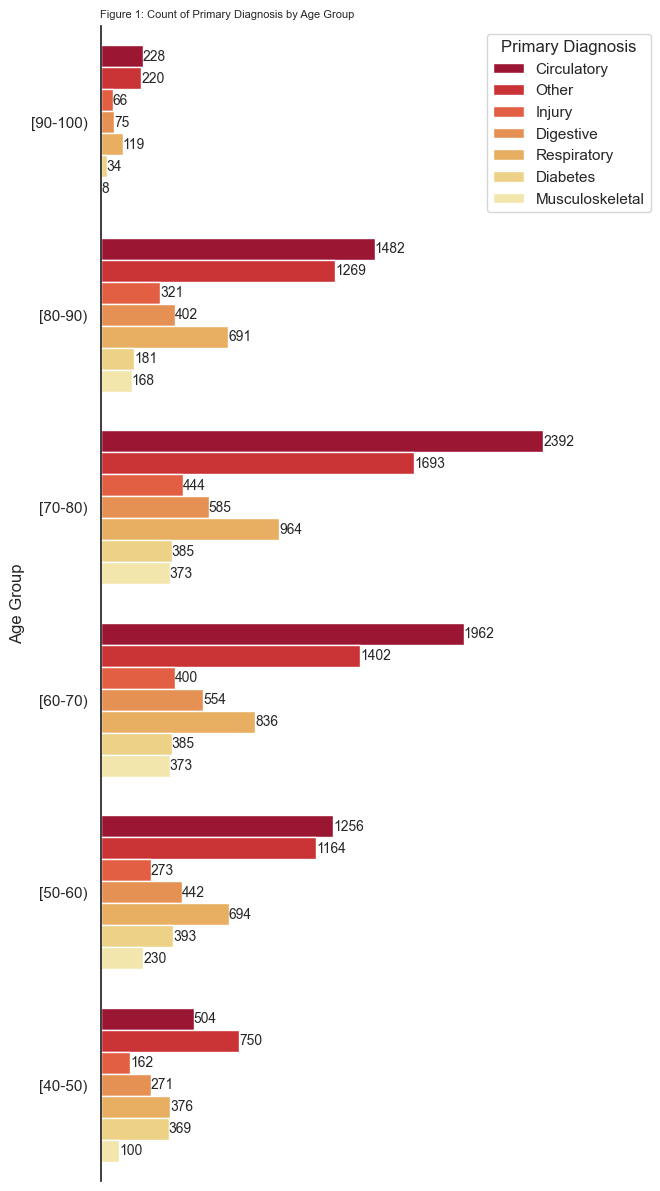

In [2]:

df = pd.read_csv('data/hospital_readmissions.csv')

rslt_df = df[df['diag_1'] != 'Missing']
             
palette = ["#b10026", "#e31a1c", "#fc4e2a", "#fd8d3c", "#feb24c", "#fed976", "#ffeda0"]
sns.set()
sns.set_style("white")
order = ["[90-100)" ,"[80-90)", "[70-80)","[60-70)","[50-60)","[40-50)"]
plt.figure(figsize=(6,15))
TP = sns.countplot(data=rslt_df , 
              y="age",
              hue="diag_1", 
              palette= palette, 
              order= order)
TP.legend(title='Primary Diagnosis',bbox_to_anchor= (1.2,1))
TP.set(xlabel= None)
TP.set(ylabel= 'Age Group')
TP.set(xticklabels=[])
TP.set_title('Figure 1: Count of Primary Diagnosis by Age Group',
                                     loc = "left",
                                    fontsize= 8) 
sns.despine(bottom = True, left = False) #removes borders
for i in TP.containers:
    TP.bar_label(i,fontsize=10)
plt.show()

Next, we will explore the effect that diabetes has on readmission rates. Figure 2 is visualizing the percentage of readmittance rates by all the primary diagnoses. It appears that those with diabetes had the highest readmission rate at 54%. A primary respiratory diagnosis has also has a high readmission rate at 49% as well as a primary circulatory diagnosis which has a 48% readmission rate.

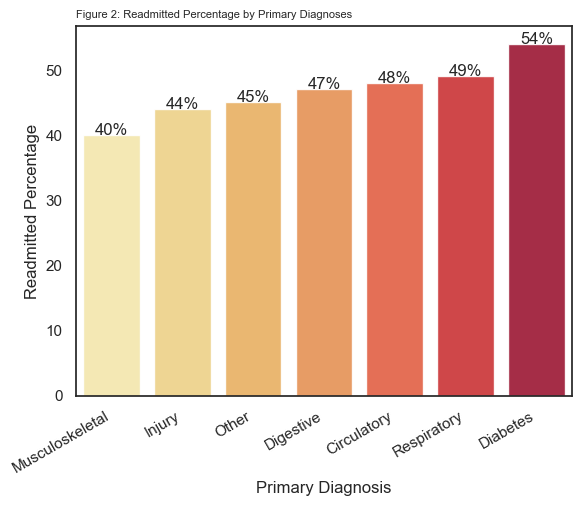

In [3]:
import pandas as pd
import numpy as np
from scipy import stats


df['diag_1'] = df['diag_1'] != 'Missing'



Diag_tab = pd.crosstab(rslt_df['diag_1'], rslt_df["readmitted"], margins=True)

Readmit_Tab = Diag_tab.iloc[0:7, 1:3]


Readmit_Tab["Perc"] = (Readmit_Tab['yes']/Readmit_Tab['All']*100).round(0)

Readmit_Tab = Readmit_Tab.sort_values("Perc")



value1 = Readmit_Tab["Perc"]


lst = [] 
for each in value1: 
    lst.append(str(each).split('.')[0]) 
  
# all values converting to integer data type 
final_values = [int(i) for i in lst] 


palette = ["#ffeda0", "#fed976","#feb24c","#fd8d3c","#fc4e2a",  "#e31a1c", "#b10026"]

ax = sns.barplot(data = Readmit_Tab, x = "diag_1", y = "Perc", palette= palette, alpha = .9)
ax.set(xlabel= "Primary Diagnosis")
plt.xticks(rotation=30, ha='right')
ax.set(ylabel ="Readmitted Percentage")
ax.set_title('Figure 2: Readmitted Percentage by Primary Diagnoses',
                                     loc = "left",
                                    fontsize= 8) 
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.0f}%'.format(final_values[i]), (x, y), ha='center')
plt.show()




Although figure 2 visualizes readmittance rates by primary diagnosis, it does not let us know whether there is a statisticallly significant relationship between primary diagnoses and readmittance. Furthermore, it does not let us know if diabetes has a statistically significant effect on readmittance rates. This is where the chi squared test of independence comes in. The chi square test of independence is a statistical hypothesis test used to determine whether two categorical or nominal variables are likely to be related or not. We will be utilizing the chi2_contingency function from the scipy.stats package to perform the chi square test. Before performing the test we would need to establish a null and alternative hypothesis.

**Null Hypothesis**: Readmission rates are the same for all primary diagnoses. 

**Alternative Hypothesis**: Readmission rates differ between primary diagnoses. 

**Significance level (α)**: 0.05

The return output that the chi2_contingency function gives is the chi squared value, (84.89513380512619), the p-value (3.4704584980101605e-16), and the degrees of freedom (6), along with the expected values in an array. Our significance level is 0.05 and from reviewing the P-value,3.4704584980101605e-16, from our Chi2_contingency function we see that the p-value is < 0.05 so we can **reject the null** and accept the alternative hypothesis that **readmission rates differ among primary diagnoses**. We can conclude that there is some relationship between primary diagnoses and readmissions. 

In [22]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

Diag_tab = pd.crosstab(rslt_df['diag_1'], rslt_df["readmitted"], margins=True)
Diag_tab.columns = ['no','yes','row_total']
Diag_tab.index= ["Circulatory", "Diabetes", "Digestive", "Injury", "Musculoskeletal", "Other", "Respiratory",'col_total']

#observed df is values w/o totals
observed = Diag_tab.iloc[0:7, 0:2]


chi2, p, dof, ex = chi2_contingency(observed, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")


stats.chi2_contingency(observed=observed)





Chi2 result of the contingency table: 84.89513380512619, p-value: 3.4704584980101605e-16


(84.89513380512619,
 3.4704584980101605e-16,
 6,
 array([[4145.50552088, 3678.49447912],
        [ 925.63882221,  821.36117779],
        [1234.00848136, 1094.99151864],
        [ 882.72139542,  783.27860458],
        [ 663.36565851,  588.63434149],
        [3442.93134902, 3055.06865098],
        [1949.8287726 , 1730.1712274 ]]))

In [14]:
print("Is the p-value less than the significance level:")
print(3.4704584980101605e-16<0.05)

Is the p-value less than the significance level:
True


Now we can conduct post hoc tests comparing each pair of primary diagnoses using a chi-square test of independence to see how each primary diagnoses differs from each other. This step helps to decipher which primary diagnoses are signficantly different from one another in relation to readmissions by running chi square tests on pairs. There are 21 different combinations and since we are running a seperate chi square test the overall Type 1 error across all these test would increase beyond the 0.05 limit. We will need to implement the Bonferonni adjustment on the significance level of 0.05 to control for this error. The Bonferonni adjustment requires us to divide our significance level by the total number of test pairs. This would be 0.05 divided by 21. The result is 0.00238 so this will be the new significance level that will be compared to the p-values. 

In [21]:
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests

def get_asterisks_for_pval(p_val):
    """Receives the p-value and returns asterisks string."""
    if p_val > 0.00238095238:
        p_text = "ns"  # above threshold => not significant
    elif p_val < 1e-4:  
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'
    
    return p_text



def chisq_and_posthoc_corrected(observed):
    chi2, p, dof, ex = chi2_contingency(observed, correction=True)


all_combinations = list(combinations(observed.index, 2))
p_vals = []
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = observed[(observed.index == comb[0]) | (observed.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
    p_vals.append(p)
    
reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh',alpha=0.00238095238)[:2]
for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
    print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject:{reject}")
        




('Circulatory', 'Diabetes'): p_value: 0.000018; corrected: 0.000054 (****) reject:True
('Circulatory', 'Digestive'): p_value: 0.698745; corrected: 0.698745 (ns) reject:False
('Circulatory', 'Injury'): p_value: 0.001581; corrected: 0.002554 (**) reject:False
('Circulatory', 'Musculoskeletal'): p_value: 0.000000; corrected: 0.000000 (****) reject:True
('Circulatory', 'Other'): p_value: 0.000848; corrected: 0.001484 (***) reject:True
('Circulatory', 'Respiratory'): p_value: 0.259341; corrected: 0.286640 (ns) reject:False
('Diabetes', 'Digestive'): p_value: 0.000105; corrected: 0.000275 (***) reject:True
('Diabetes', 'Injury'): p_value: 0.000000; corrected: 0.000000 (****) reject:True
('Diabetes', 'Musculoskeletal'): p_value: 0.000000; corrected: 0.000000 (****) reject:True
('Diabetes', 'Other'): p_value: 0.000000; corrected: 0.000000 (****) reject:True
('Diabetes', 'Respiratory'): p_value: 0.001876; corrected: 0.002814 (**) reject:False
('Digestive', 'Injury'): p_value: 0.018805; correcte

**Key findings from Figure 3**: 

- There is a statistically significant difference between the rates of readmissions between patients with  **diabetes** and all other primary diagnoses except for when compared to patients with a respiratory primary diagnosis. The rates of readmissons between diabetes and respiratory did not differ significantly.
- There is a statistically significant difference between the rates of readmissions between patients with a **circulatory** primary diagnosis and all other primary diagnoses except for when compared to patients with digestive, injury, or respiratory. The rates of readmissons between circulatory and digestive, injury, or respiratory did not differ significantly.
- There is a statistically significant difference between rates of readmissions between patients with a **respiratory** primary diagnosis and all other primary diagnoses except for digestive, diabetes, and  cicirculatory. The rates of readmissons between respiratory and digestive, diabetes, or cicirculatory did not differ significantly.

Lastly, we will be analyzing the relationships between other groups and readmission rates. We've already taken a look at how primary diaganoses effects readmission rates, now we will go further and analyze other groups and readmission rates starting with age group.
 
We will perform another chi square test of independence to examine the relationship between age group and readmission rates, but first lets establish our null and alternate hypothesis.

**Null Hypothesis**: There is no association between Readmission rates and age groups. 

**Alternative Hypothesis**: There is an association between Readmission rates and age groups. 

**Significance level (α)**: 0.05

In [25]:
#age group: indepentent variable age group (the factor being studied is age which is one factor so one way is being used)
import scipy.stats as stats

Diag_tab = pd.crosstab(rslt_df['age'], rslt_df["readmitted"], margins=True)


observed2 = Diag_tab.iloc[0:7, 0:2]


# quick way to do chi square test

chi2, p, dof, ex = chi2_contingency(observed2, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

stats.chi2_contingency(observed=observed2)


Chi2 result of the contingency table: 48.69990176580726, p-value: 8.561507448904714e-09


(48.69990176580726,
 8.561507448904714e-09,
 6,
 array([[ 1341.56697072,  1190.43302928],
        [ 2358.86893903,  2093.13106097],
        [ 3132.44231077,  2779.55768923],
        [ 3622.01888302,  3213.98111698],
        [ 2391.71931509,  2122.28068491],
        [  397.38358137,   352.61641863],
        [13244.        , 11752.        ]]))

Utilizing the chi2_contingency function for checking the relationship between age groups and readmissions, we see that the p-value, 8.223679855926922e-09, is less than the 0.05 significance level meaning that  we can **reject the null hypothesis** and accept the alternative that **there is an association between readmission rates and age groups.**

A line graph could help examine the association between patients' age and the weighted readmission rates since the different number of patients in each age group could skew the result. By comparing it to the average weighted readmission rate, it would be easy to identify groups of patients with the highest readmission rates and focus monitoring efforts on them.

Figure 4: Weighted Readmission Rate by Age Group


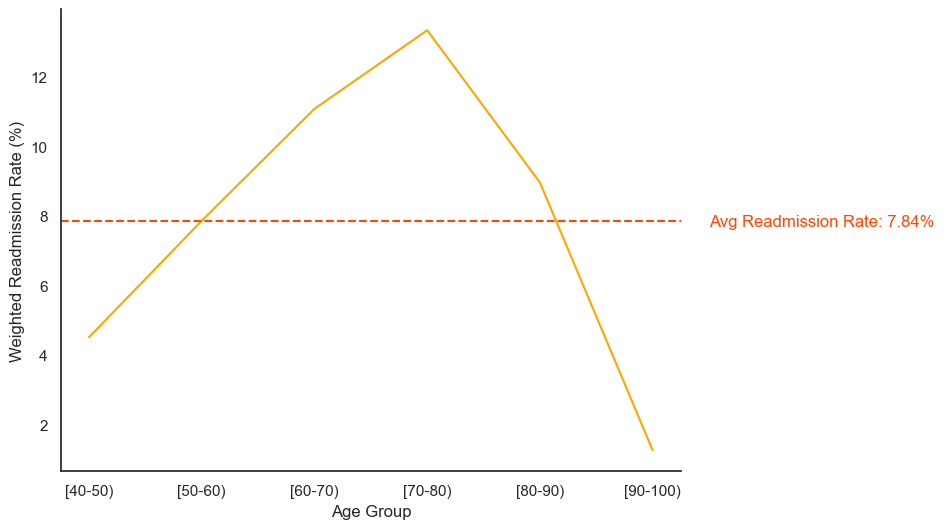

In [10]:
rslt_df = df[df['diag_1'] != 'Missing']
rslt_df['readmitted'] = rslt_df['readmitted'].map({'yes':1,'no':0}) 




mean = rslt_df.groupby('age')['readmitted'].mean().mul(100).round(2) #without mul values would be like .44 etc

patients = rslt_df.groupby('age').size() #basically count

age_Group = rslt_df['age'].sort_values().unique() #distinct values in sorted list


re_by_age = pd.DataFrame({
    'Age Group': age_Group,
    'Num Patients': patients,
    'readmission rate (%)': mean
})



re_by_age['weights'] = re_by_age['Num Patients']/re_by_age['Num Patients'].sum()

re_by_age['weighted readmission rate (%)'] = round(re_by_age['readmission rate (%)'] * re_by_age['weights'],2)

avg_readmissions = re_by_age['weighted readmission rate (%)'].mean().round(2)

print('Figure 4: Weighted Readmission Rate by Age Group')
fig = plt.figure(figsize = (8,6))
sns.set_style('white')
sns.set_palette('Paired')

sns.lineplot(x = 'Age Group', y = 'weighted readmission rate (%)', data =re_by_age, color = 'orange' )

plt.axhline(y = avg_readmissions, color = 'orangered', linestyle = '--' )

plt.text(6.5, avg_readmissions,
         f'Avg Readmission Rate: {avg_readmissions}%',
        ha = 'center', va = 'center',
        color = 'orangered', fontsize = 12)

plt.xlabel('Age Group', fontsize = 12)
plt.ylabel('Weighted Readmission Rate (%)', fontsize = 12)
sns.despine()

plt.show()

**Key findings from Figure 4**: 

- Patients from ages 50 to 90 are at high risk for readmissions as they are over the average readmission rate. 
- The spike at the 70 - 80 age group indiates that this age group is more susceptible to readmissions. 

Now, we will explore out patient and in patient visits and readmission rates. The meaning of outpatient is a patient who is not hospitalized overnight but who visits a hospital. In patient means a patient that stays in a hospital while receiving medical care or treatment. Below we have created two bar plots, figures 5 & 6, to help examine the association between outpatient and inpatient visits. 

Figure 5


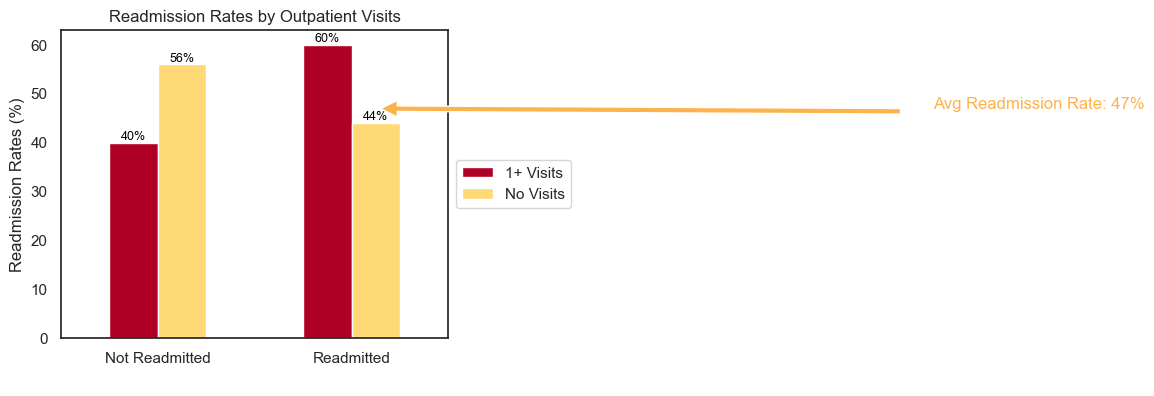

In [201]:
import numpy as np
import pandas as pd

rslt_df = df[df['diag_1'] != 'Missing']
rslt_df['readmitted'] = rslt_df['readmitted'].map({'yes':1,'no':0}) 


Outpatient_Categories = ['No Visits', '1+ Outpatient Visits']
rslt_df['new'] = rslt_df["n_outpatient"].astype(str)

OneorMore_OutVisits = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17', '18','19','20',
                       '21','22','23','24','25','26','27', '28','29','30','31','32','33']

No_Visits = '0'
Visits =  rslt_df["new"].isin(OneorMore_OutVisits)

Conditions = [
    (rslt_df["new"].str.contains(No_Visits)),
    rslt_df["new"].isin(OneorMore_OutVisits)
]

rslt_df["Outpatient_Cat"] = np.select(Conditions, Outpatient_Categories, default="Other")

t1 = pd.DataFrame(rslt_df
      .groupby('Outpatient_Cat')['readmitted']
      .value_counts(normalize = True)
      .mul(100)
      .round()
      .reset_index(name = 'readmission rate (%)')
     ) 

#find readmission rate mean
tot_mean = round((rslt_df.readmitted.mean()*100))



t2 = pd.DataFrame([['1+ Visits', 'Readmitted', 60], ['1+ Visits', 'Not Readmitted', 40],['No Visits','Readmitted',44],['No Visits','Not Readmitted', 56]],columns=['group','col','val'])

bar_colors = ['#b10026', '#fed976']
plt.rcParams['figure.figsize'] = [5,4]
t = t2.pivot("col", "group", "val").plot(kind='bar',color =bar_colors)

plt.title('Readmission Rates by Outpatient Visits')
plt.ylabel('Readmission Rates (%)')
plt.xlabel(' ')
plt.xticks(rotation=0)
plt.annotate('Avg Readmission Rate: 47%', xy =(1, 47), 
                xytext =(4, 47), color= '#feb24c',
                arrowprops = dict(facecolor ='#feb24c', 
                                  shrink = 0.05),) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#add labels on bars
for bar in t.patches:

  bar_value = bar.get_height()
 
  text = f'{bar_value:}%'

  text_x = bar.get_x() + bar.get_width() / 2

  text_y = bar.get_y() + bar_value

  bar_color = bar.get_facecolor()

  t.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=9)


print('Figure 5')
plt.show()

Figure 6


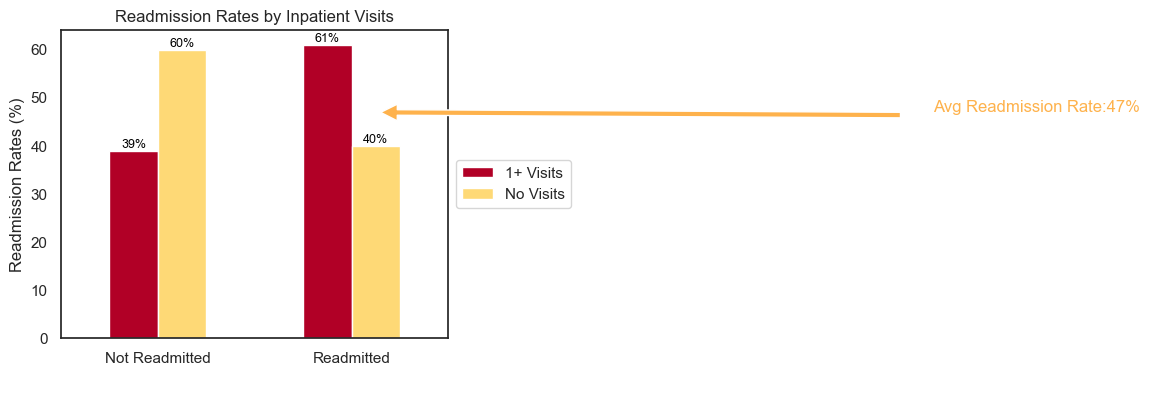

In [200]:
#Inpatient
#Count num of inpatient visits 
#print(rslt_df["n_inpatient"].value_counts())
rslt_df = df[df['diag_1'] != 'Missing']
rslt_df['readmitted'] = rslt_df['readmitted'].map({'yes':1,'no':0}) 


Inpatient_Categories = ['No Visits', '1+ Inpatient Visits']
rslt_df['new'] = rslt_df["n_inpatient"].astype(str)

OneorMore_InVisits = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']

No_Visits = '0'
Visits =  rslt_df["new"].isin(OneorMore_InVisits)

Conditions = [
    (rslt_df["new"].str.contains(No_Visits)),
    rslt_df["new"].isin(OneorMore_InVisits)
]

rslt_df["Inpatient_Cat"] = np.select(Conditions, Inpatient_Categories, default="Other")

tab1 = pd.DataFrame(rslt_df
      .groupby('Inpatient_Cat')['readmitted']
      .value_counts(normalize = True)
      .mul(100)
      .round()
      .reset_index(name = 'readmission rate (%)')
     ) 




#find reaadmission rate mean 
tot_mean = round((rslt_df.readmitted.mean()*100))


tab2 = pd.DataFrame([['1+ Visits', 'Readmitted', 61], ['1+ Visits', 'Not Readmitted', 39],['No Visits','Readmitted',40],['No Visits','Not Readmitted', 60]],columns=['group','col','val'])

bar_colors = ['#b10026', '#fed976']
plt.rcParams['figure.figsize'] = [5,4]
t_2 = tab2.pivot("col", "group", "val").plot(kind='bar',color =bar_colors)



plt.title('Readmission Rates by Inpatient Visits')
plt.ylabel('Readmission Rates (%)')
plt.xlabel(' ')
plt.xticks(rotation=0)
plt.annotate('Avg Readmission Rate:47%', xy =(1, 47), 
                xytext =(4, 47), color= '#feb24c',
                arrowprops = dict(facecolor ='#feb24c', 
                                  shrink = 0.05),) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for bar in t_2.patches:

  bar_value = bar.get_height()
 
  text = f'{bar_value:}%'

  text_x = bar.get_x() + bar.get_width() / 2

  text_y = bar.get_y() + bar_value

  bar_color = bar.get_facecolor()

  t_2.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=9)

print('Figure 6')
plt.show()

**Key findings from figures 5 & 6**:

- The readmission rate of patients with more that 1 outpatient visit is 60%, which is higher than the average readmission rate which is 47% and also higher than patients with no oupatient visits.
- The readmission rate of patients with more that 1 inpatient visit is 61%, which is higher than the average readmission rate which is 47% and also higher than patients with no oupatient visits. 

## Conclusions and Recommendations

From the report, we can conclude that certain groups are more suseptible to being readmitted to the hospital. According to the statistics, older patients and those with particular illnesses are more likely to be readmitted to the hospital. The hospital should prioritize follow-up procedures for patients 50 to 90 years old, as well as those with diabetes, circulatory, and respiratory diseases, to reduce the higher risk of readmission. Additionally, patients with diabetes are more likely to be readmitted than those with other main illnesses. The number of outpaitent and inpatient visits should also be taken into account.

**Recommendations**
- Additional statistical analyses should be conducted on patient groups identified as having a high likelihood of readmission to determine if other factors are also contributing to their readmission rates.
- To reduce readmission rates, the hospital may consider implementing targeted intervention programs for patients in the identified age groups with high readmission rates along with those patients who have a diabetic, circulatory, or respiratory primary diagnosis. 
- Further analysis of patient care during inpatient and outpatient visits should be conducted to determine if the proper patient care is being administered.This could potentially help reduce readmissions as well. Other statistically analyses should be conducted to determine statistical significance.
- Expand the "Other" diagnosis for people aged 40 to 50 to better understand the underlying causes and potential implications for patient care.
- Perform a cost-benefit analysis to determine the impact of follow-up efforts on patient outcomes and healthcare costs.
- Further research should be collected about gender, race, and socioeconomic status as these are factors that could also influence readmission rates greatly.

### Code Section

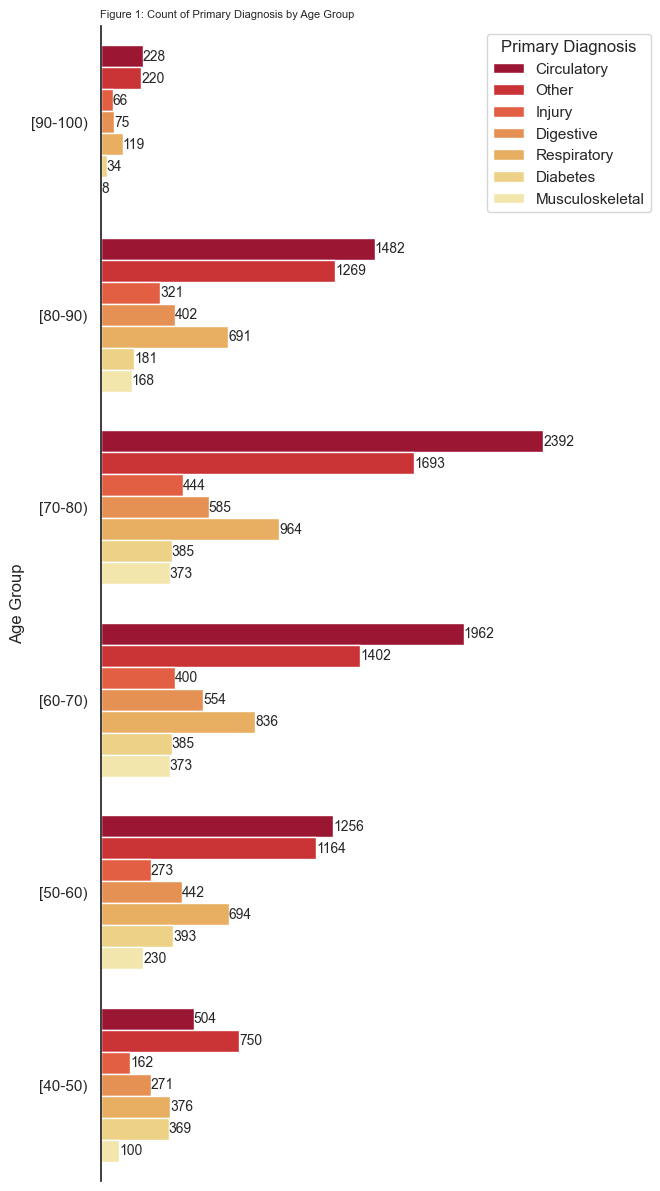

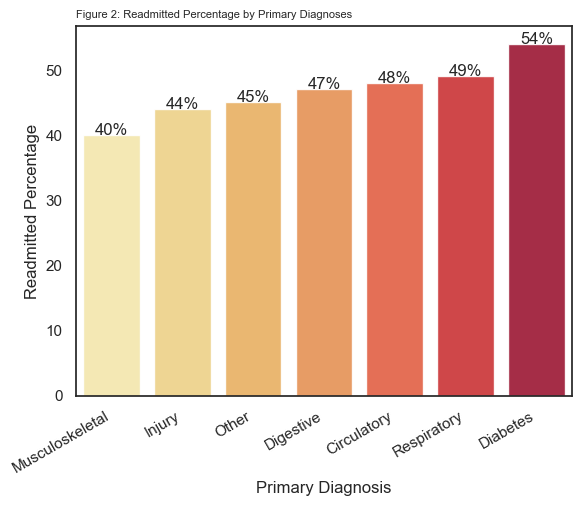

True
False
True
True
True
False
True
True
True
True
True
False
True
False
False
False
False
True
True
True
True


Figure 4: Weighted Readmission Rate by Age Group


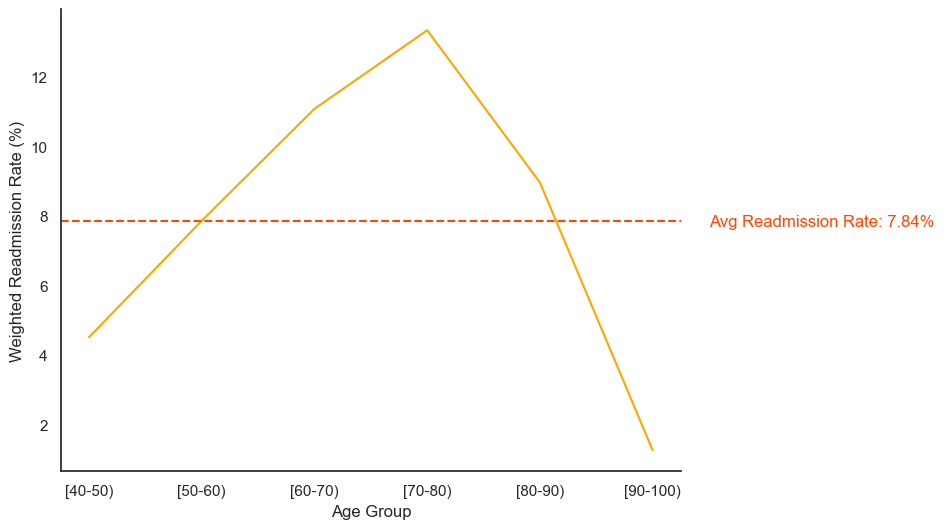

In [12]:
# importing Libraries

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as stats
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests
#import df 

df = pd.read_csv('data/hospital_readmissions.csv')
#data cleaning and inspection 

df.info()
df.is.na().sum()
df.duplicated.sum()

check outliers
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)

IQR = Q3-Q1

lowerbound = Q1 -1.5 *IQR
upperbound = Q3 -1.5 *IQR

outliers = num[num < lowerbound | (num > upperbound)]

print(f'Total Outliers:{outliers.count().sum()}\n\nNumber of outliers in each column:\n{outliers.count}')

# Bar graph for primary diagnoses by age / Figure 1

rslt_df = df[df['diag_1'] != 'Missing']
             
palette = ["#b10026", "#e31a1c", "#fc4e2a", "#fd8d3c", "#feb24c", "#fed976", "#ffeda0"]
sns.set()
sns.set_style("white")
order = ["[90-100)" ,"[80-90)", "[70-80)","[60-70)","[50-60)","[40-50)"]
plt.figure(figsize=(6,15))
TP = sns.countplot(data=rslt_df , 
              y="age",
              hue="diag_1", 
              palette= palette, 
              order= order)
TP.legend(title='Primary Diagnosis',bbox_to_anchor= (1.2,1))
TP.set(xlabel= None)
TP.set(ylabel= 'Age Group')
TP.set(xticklabels=[])
TP.set_title('Figure 1: Count of Primary Diagnosis by Age Group',
                                     loc = "left",
                                    fontsize= 8) 
sns.despine(bottom = True, left = False) #removes borders
for i in TP.containers:
    TP.bar_label(i,fontsize=10)
plt.show()


# figure 2/ 

df['diag_1'] = df['diag_1'] != 'Missing'



Diag_tab = pd.crosstab(rslt_df['diag_1'], rslt_df["readmitted"], margins=True)

Readmit_Tab = Diag_tab.iloc[0:7, 1:3]


Readmit_Tab["Perc"] = (Readmit_Tab['yes']/Readmit_Tab['All']*100).round(0)

Readmit_Tab = Readmit_Tab.sort_values("Perc")



value1 = Readmit_Tab["Perc"]


lst = [] 
for each in value1: 
    lst.append(str(each).split('.')[0]) 
  
# all values converting to integer data type 
final_values = [int(i) for i in lst] 


palette = ["#ffeda0", "#fed976","#feb24c","#fd8d3c","#fc4e2a",  "#e31a1c", "#b10026"]

ax = sns.barplot(data = Readmit_Tab, x = "diag_1", y = "Perc", palette= palette, alpha = .9)
ax.set(xlabel= "Primary Diagnosis")
plt.xticks(rotation=30, ha='right')
ax.set(ylabel ="Readmitted Percentage")
ax.set_title('Figure 2: Readmitted Percentage by Primary Diagnoses',
                                     loc = "left",
                                    fontsize= 8) 
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.0f}%'.format(final_values[i]), (x, y), ha='center')
plt.show()


# Chi square test Diagnosis and readmissions/chi2_contingency
Diag_tab = pd.crosstab(rslt_df['diag_1'], rslt_df["readmitted"], margins=True)
Diag_tab.columns = ['no','yes','row_total']
Diag_tab.index= ["Circulatory", "Diabetes", "Digestive", "Injury", "Musculoskeletal", "Other", "Respiratory",'col_total']

#observed df is values w/o totals
observed = Diag_tab.iloc[0:7, 0:2]


chi2, p, dof, ex = chi2_contingency(observed, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")


stats.chi2_contingency(observed=observed)





# Post hoc chi square tests

# see if significantly different from one another - diagnoses
# .05/ 21 (combos) = p = 0.00238


def get_asterisks_for_pval(p_val):
    """Receives the p-value and returns asterisks string."""
    if p_val > 0.00238095238:
        p_text = "ns"  # above threshold => not significant
    elif p_val < 1e-4:  
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'
    
    return p_text



def chisq_and_posthoc_corrected(observed):
    chi2, p, dof, ex = chi2_contingency(observed, correction=True)


all_combinations = list(combinations(observed.index, 2))
p_vals = []
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = observed[(observed.index == comb[0]) | (observed.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
    p_vals.append(p)
    
reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh',alpha=0.00238095238)[:2]
for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
    print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject:{reject}")
        

        
#Age Chi Square test/chi2_contingency
Diag_tab = pd.crosstab(rslt_df['age'], rslt_df["readmitted"], margins=True)


observed2 = Diag_tab.iloc[0:7, 0:2]


# quick way to do chi square test

chi2, p, dof, ex = chi2_contingency(observed2, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

stats.chi2_contingency(observed=observed2)


# Figure 4: Weighted Readmission Rate by Age Group
    
    
rslt_df = df[df['diag_1'] != 'Missing']
rslt_df['readmitted'] = rslt_df['readmitted'].map({'yes':1,'no':0}) 




mean = rslt_df.groupby('age')['readmitted'].mean().mul(100).round(2) #without mul values would be like .44 etc

patients = rslt_df.groupby('age').size() #basically count

age_Group = rslt_df['age'].sort_values().unique() #distinct values in sorted list


re_by_age = pd.DataFrame({
    'Age Group': age_Group,
    'Num Patients': patients,
    'readmission rate (%)': mean
})



re_by_age['weights'] = re_by_age['Num Patients']/re_by_age['Num Patients'].sum() # total patients by age group/ total patients all together

re_by_age['weighted readmission rate (%)'] = round(re_by_age['readmission rate (%)'] * re_by_age['weights'],2)

avg_readmissions = re_by_age['weighted readmission rate (%)'].mean().round(2)

print('Figure 4: Weighted Readmission Rate by Age Group')
fig = plt.figure(figsize = (8,6))
sns.set_style('white')
sns.set_palette('Paired')

sns.lineplot(x = 'Age Group', y = 'weighted readmission rate (%)', data =re_by_age, color = 'orange' )

plt.axhline(y = avg_readmissions, color = 'orangered', linestyle = '--' )

plt.text(6.5, avg_readmissions,
         f'Avg Readmission Rate: {avg_readmissions}%',
        ha = 'center', va = 'center',
        color = 'orangered', fontsize = 12)

plt.xlabel('Age Group', fontsize = 12)
plt.ylabel('Weighted Readmission Rate (%)', fontsize = 12)
sns.despine()

plt.show()


#Figure 5/ Outpatient Visits and readmission rates 
rslt_df = df[df['diag_1'] != 'Missing']
rslt_df['readmitted'] = rslt_df['readmitted'].map({'yes':1,'no':0}) 


Outpatient_Categories = ['No Visits', '1+ Outpatient Visits']
rslt_df['new'] = rslt_df["n_outpatient"].astype(str)

OneorMore_OutVisits = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17', '18','19','20',
                       '21','22','23','24','25','26','27', '28','29','30','31','32','33']

No_Visits = '0'
Visits =  rslt_df["new"].isin(OneorMore_OutVisits)

Conditions = [
    (rslt_df["new"].str.contains(No_Visits)),
    rslt_df["new"].isin(OneorMore_OutVisits)
]

rslt_df["Outpatient_Cat"] = np.select(Conditions, Outpatient_Categories, default="Other")

t1 = pd.DataFrame(rslt_df
      .groupby('Outpatient_Cat')['readmitted']
      .value_counts(normalize = True)
      .mul(100)
      .round()
      .reset_index(name = 'readmission rate (%)')
     ) 

#find readmission rate mean
tot_mean = round((rslt_df.readmitted.mean()*100))



t2 = pd.DataFrame([['1+ Visits', 'Readmitted', 60], ['1+ Visits', 'Not Readmitted', 40],['No Visits','Readmitted',44],['No Visits','Not Readmitted', 56]],columns=['group','col','val'])

bar_colors = ['#b10026', '#fed976']
plt.rcParams['figure.figsize'] = [5,4]
t = t2.pivot("col", "group", "val").plot(kind='bar',color =bar_colors)

plt.title('Readmission Rates by Outpatient Visits')
plt.ylabel('Readmission Rates (%)')
plt.xlabel(' ')
plt.xticks(rotation=0)
plt.annotate('Avg Readmission Rate: 47%', xy =(1, 47), 
                xytext =(4, 47), color= '#feb24c',
                arrowprops = dict(facecolor ='#feb24c', 
                                  shrink = 0.05),) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#add labels on bars
for bar in t.patches:

  bar_value = bar.get_height()
 
  text = f'{bar_value:}%'

  text_x = bar.get_x() + bar.get_width() / 2

  text_y = bar.get_y() + bar_value

  bar_color = bar.get_facecolor()

  t.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=9)


print('Figure 5')
plt.show()

#Figure 6/Inpatient Visits and readmission rates 
#Inpatient
#Count num of inpatient visits 
#print(rslt_df["n_inpatient"].value_counts())
rslt_df = df[df['diag_1'] != 'Missing']
rslt_df['readmitted'] = rslt_df['readmitted'].map({'yes':1,'no':0}) 


Inpatient_Categories = ['No Visits', '1+ Inpatient Visits']
rslt_df['new'] = rslt_df["n_inpatient"].astype(str)

OneorMore_InVisits = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']

No_Visits = '0'
Visits =  rslt_df["new"].isin(OneorMore_InVisits)

Conditions = [
    (rslt_df["new"].str.contains(No_Visits)),
    rslt_df["new"].isin(OneorMore_InVisits)
]

rslt_df["Inpatient_Cat"] = np.select(Conditions, Inpatient_Categories, default="Other")

tab1 = pd.DataFrame(rslt_df
      .groupby('Inpatient_Cat')['readmitted']
      .value_counts(normalize = True)
      .mul(100)
      .round()
      .reset_index(name = 'readmission rate (%)')
     ) 




#find reaadmission rate mean 
tot_mean = round((rslt_df.readmitted.mean()*100))


tab2 = pd.DataFrame([['1+ Visits', 'Readmitted', 61], ['1+ Visits', 'Not Readmitted', 39],['No Visits','Readmitted',40],['No Visits','Not Readmitted', 60]],columns=['group','col','val'])

bar_colors = ['#b10026', '#fed976']
plt.rcParams['figure.figsize'] = [5,4]
t_2 = tab2.pivot("col", "group", "val").plot(kind='bar',color =bar_colors)



plt.title('Readmission Rates by Inpatient Visits')
plt.ylabel('Readmission Rates (%)')
plt.xlabel(' ')
plt.xticks(rotation=0)
plt.annotate('Avg Readmission Rate:47%', xy =(1, 47), 
                xytext =(4, 47), color= '#feb24c',
                arrowprops = dict(facecolor ='#feb24c', 
                                  shrink = 0.05),) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for bar in t_2.patches:

  bar_value = bar.get_height()
 
  text = f'{bar_value:}%'

  text_x = bar.get_x() + bar.get_width() / 2

  text_y = bar.get_y() + bar_value

  bar_color = bar.get_facecolor()

  t_2.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=9)

print('Figure 6')
plt.show()


